In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the data from the CSV file
file_path = "C:/Users/Admin/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Identify numeric attributes
numeric_attributes = [col for col, dtype in attribute_data_types.items() if dtype == 'Numeric']

# Function to detect outliers using the IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Normalization/Scaling
def normalize_data(df):
    scaler_minmax = MinMaxScaler()
    scaler_standard = StandardScaler()
    
    for col in numeric_attributes:
        # Detect outliers
        outliers = detect_outliers_iqr(df[col])
        
        if not outliers.empty:
            # Apply standardization for attributes with outliers
            df[[col]] = scaler_standard.fit_transform(df[[col]])
        else:
            # Apply min-max normalization for attributes without outliers
            df[[col]] = scaler_minmax.fit_transform(df[[col]])
    
    return df

# Example usage
df_normalized = normalize_data(df)

# Display the normalized dataset
print(df_normalized)


         Record ID       age sex on thyroxine query on thyroxine  \
0     0.000000e+00 -0.037634   F            f                  f   
1     3.410871e-08 -0.037634   F            f                  f   
2     9.891527e-07 -0.027499   F            f                  f   
3     6.934301e-05 -0.031722   F            f                  f   
4     6.937712e-05 -0.035100   F            f                  f   
...            ...       ...  ..          ...                ...   
9167  9.999996e-01 -0.014829   M            f                  f   
9168  9.999996e-01 -0.043547   M            f                  f   
9169  9.999997e-01 -0.003848   M            f                  f   
9170  9.999997e-01 -0.022431   F            f                  f   
9171  1.000000e+00 -0.035945   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                        

In [9]:
import pandas as pd

# Load the data
file_path = "C:/Users/Admin/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Extract the first two observation vectors
vector_1 = df.iloc[0]
vector_2 = df.iloc[1]

# Function to identify binary attributes
def is_binary(series):
    unique_values = series.dropna().unique()
    return set(unique_values).issubset({0, 1})

# Filter only binary attributes
binary_attributes = [col for col in df.columns if is_binary(df[col])]
vector_1 = vector_1[binary_attributes]
vector_2 = vector_2[binary_attributes]

# Calculate f11, f00, f01, and f10
f11 = sum((vector_1 == 1) & (vector_2 == 1))
f00 = sum((vector_1 == 0) & (vector_2 == 0))
f01 = sum((vector_1 == 0) & (vector_2 == 1))
f10 = sum((vector_1 == 1) & (vector_2 == 0))

# Calculate Jaccard Coefficient (JC) and handle ZeroDivisionError
try:
    jc = f11 / (f01 + f10 + f11)
except ZeroDivisionError:
    jc = 0.0  # Define JC as 0 if the denominator is 0

# Calculate Simple Matching Coefficient (SMC)
try:
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)
except ZeroDivisionError:
    smc = 0.0  # Define SMC as 0 if the denominator is 0

# Display results
print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

# Comparison
if jc > smc:
    print("Jaccard Coefficient is greater than Simple Matching Coefficient.")
elif jc < smc:
    print("Simple Matching Coefficient is greater than Jaccard Coefficient.")
else:
    print("Jaccard Coefficient and Simple Matching Coefficient are equal.")






Jaccard Coefficient (JC): 0.0
Simple Matching Coefficient (SMC): 0.0
Jaccard Coefficient and Simple Matching Coefficient are equal.


In [13]:
import pandas as pd
import numpy as np

# Load the data
file_path = "C:/Users/Admin/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Ensure all columns are numeric; convert or drop non-numeric columns if necessary
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values resulting from the conversion (optional)
df_numeric = df_numeric.dropna(axis=1)

# Extract the first two observation vectors
vector_1 = df_numeric.iloc[0].values
vector_2 = df_numeric.iloc[1].values

# Calculate the dot product of A and B
dot_product = np.dot(vector_1, vector_2)

# Calculate the magnitude (length) of A and B
magnitude_A = np.linalg.norm(vector_1)
magnitude_B = np.linalg.norm(vector_2)

# Calculate the Cosine Similarity
cosine_similarity = dot_product / (magnitude_A * magnitude_B)

# Display the result
print(f"Cosine Similarity between the first two vectors: {cosine_similarity}")



Cosine Similarity between the first two vectors: 0.9999999999999997


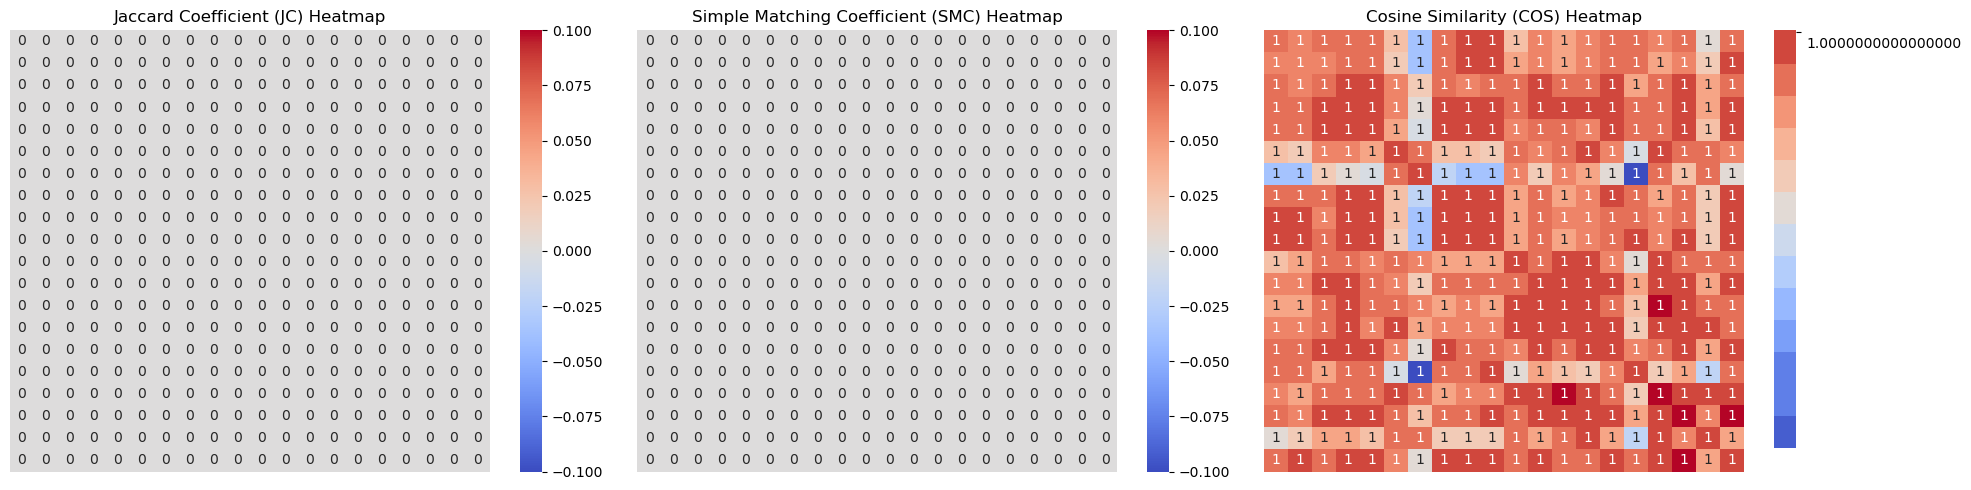

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = "C:/Users/Admin/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Consider the first 20 observation vectors
df_first_20 = df.iloc[:20]

# Convert all columns to numeric (or drop non-numeric columns if needed)
df_numeric = df_first_20.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

# Initialize matrices for JC, SMC, and COS
n = df_numeric.shape[0]
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cos_matrix = np.zeros((n, n))

# Function to calculate JC and SMC
def calculate_jc_smc(vector_1, vector_2):
    f11 = sum((vector_1 == 1) & (vector_2 == 1))
    f00 = sum((vector_1 == 0) & (vector_2 == 0))
    f01 = sum((vector_1 == 0) & (vector_2 == 1))
    f10 = sum((vector_1 == 1) & (vector_2 == 0))
    
    jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0
    smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0
    
    return jc, smc

# Calculate JC, SMC, and COS for each pair of vectors
for i in range(n):
    for j in range(i, n):
        vector_1 = df_numeric.iloc[i].values
        vector_2 = df_numeric.iloc[j].values
        
        # JC and SMC
        jc, smc = calculate_jc_smc(vector_1, vector_2)
        jc_matrix[i, j] = jc_matrix[j, i] = jc
        smc_matrix[i, j] = smc_matrix[j, i] = smc
        
        # COS
        dot_product = np.dot(vector_1, vector_2)
        magnitude_A = np.linalg.norm(vector_1)
        magnitude_B = np.linalg.norm(vector_2)
        cos = dot_product / (magnitude_A * magnitude_B) if (magnitude_A * magnitude_B) != 0 else 0
        cos_matrix[i, j] = cos_matrix[j, i] = cos

# Plot heatmaps for JC, SMC, and COS
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Jaccard Coefficient (JC) Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Simple Matching Coefficient (SMC) Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity (COS) Heatmap')

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Creating the data as per the image
file_path = "C:/Users/Admin/Documents/Purchase_Data.csv"
# Creating a DataFrame
df = pd.read_csv(file_path)

# Number of vectors in the vector space
num_vectors = len(df)
print("Number of vectors in the vector space:", num_vectors)


Number of vectors in the vector space: 10
